✅ Saved full dataset with 25600 samples -> burgers_full.csv
✅ Saved 20000 collocation points -> burgers_collocation.csv


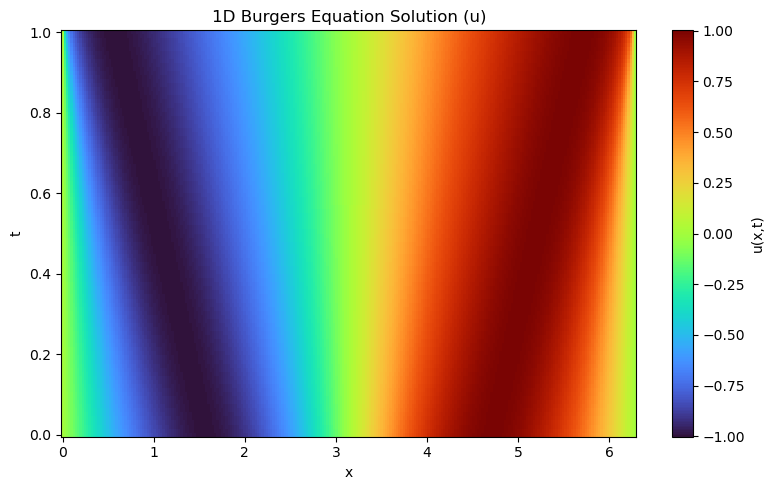

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1D Burgers' Equation Parameters
# ==========================================
nu = 0.01 / np.pi   # viscosity
nx = 256            # spatial grid points
nt = 100            # time steps
Lx = 2.0 * np.pi    # domain [0, 2π]
T = 1.0             # total time

x = np.linspace(0, Lx, nx)
t = np.linspace(0, T, nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# ==========================================
# Initial and Boundary Conditions
# ==========================================
def initial_condition(x):
    return -np.sin(x)

def apply_periodic_boundary(u):
    u[0] = u[-1]
    return u

# ==========================================
# Finite Difference Solver (Explicit)
# ==========================================
def solve_burgers(nu, nx, nt, dx, dt):
    u = np.zeros((nt, nx))
    u[0, :] = initial_condition(x)

    for n in range(0, nt - 1):
        un = u[n, :].copy()
        u[n + 1, 1:-1] = (
            un[1:-1]
            - dt / (2 * dx) * un[1:-1] * (un[2:] - un[:-2])
            + nu * dt / dx**2 * (un[2:] - 2 * un[1:-1] + un[:-2])
        )
        u[n + 1, :] = apply_periodic_boundary(u[n + 1, :])
    return u

# ==========================================
# Generate Dataset
# ==========================================
u = solve_burgers(nu, nx, nt, dx, dt)
X, Tt = np.meshgrid(x, t)
data_full = np.vstack([X.flatten(), Tt.flatten(), u.flatten()]).T

# ==========================================
# Save Full Dataset (for supervised training)
# ==========================================
df_full = pd.DataFrame(data_full, columns=["x", "t", "u"])
df_full.to_csv("burgers_full.csv", index=False)
print(f"✅ Saved full dataset with {len(df_full)} samples -> burgers_full.csv")

# ==========================================
# Collocation Points for PINN Residual Training
# ==========================================
N_f = 20000  # number of collocation points
x_f = np.random.uniform(0, Lx, (N_f, 1))
t_f = np.random.uniform(0, T, (N_f, 1))
collocation_points = np.hstack([x_f, t_f])

df_collocation = pd.DataFrame(collocation_points, columns=["x", "t"])
df_collocation.to_csv("burgers_collocation.csv", index=False)
print(f"✅ Saved {N_f} collocation points -> burgers_collocation.csv")

# ==========================================
# Visualization (optional)
# ==========================================
plt.figure(figsize=(8, 5))
plt.pcolormesh(X, Tt, u, shading="auto", cmap="turbo")
plt.xlabel("x")
plt.ylabel("t")
plt.title("1D Burgers Equation Solution (u)")
plt.colorbar(label="u(x,t)")
plt.tight_layout()
plt.show()


✅ Saved 1D Poisson dataset -> poisson_1d.csv
✅ Saved collocation points -> poisson_collocation.csv


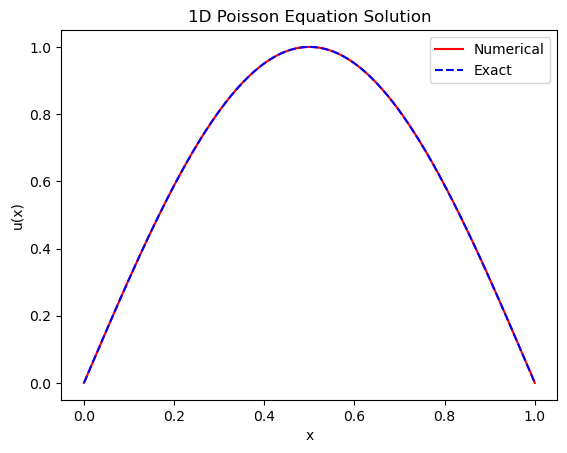

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# 1D Poisson Equation Parameters
# ==========================================
nx = 256
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]

# Source term and exact solution
f = -np.pi**2 * np.sin(np.pi * x)
u_exact = np.sin(np.pi * x)

# Finite difference solution (Dirichlet BCs)
A = np.zeros((nx, nx))
b = f.copy()

for i in range(1, nx-1):
    A[i, i-1] = 1/dx**2
    A[i, i]   = -2/dx**2
    A[i, i+1] = 1/dx**2
A[0,0] = A[-1,-1] = 1
b[0] = b[-1] = 0  # Boundary conditions

u = np.linalg.solve(A, b)

# Save dataset
df = pd.DataFrame({"x": x, "f": f, "u": u})
df.to_csv("poisson_1d.csv", index=False)
print("✅ Saved 1D Poisson dataset -> poisson_1d.csv")

# Collocation points for PINN
N_f = 5000
x_f = np.random.uniform(0, 1, (N_f, 1))
pd.DataFrame(x_f, columns=["x"]).to_csv("poisson_collocation.csv", index=False)
print("✅ Saved collocation points -> poisson_collocation.csv")

# Plot
plt.figure()
plt.plot(x, u, 'r-', label="Numerical")
plt.plot(x, u_exact, 'b--', label="Exact")
plt.xlabel("x"); plt.ylabel("u(x)")
plt.title("1D Poisson Equation Solution")
plt.legend(); plt.show()


✅ Saved Allen–Cahn dataset -> allen_cahn_1d.csv
✅ Saved collocation points -> allen_cahn_collocation.csv


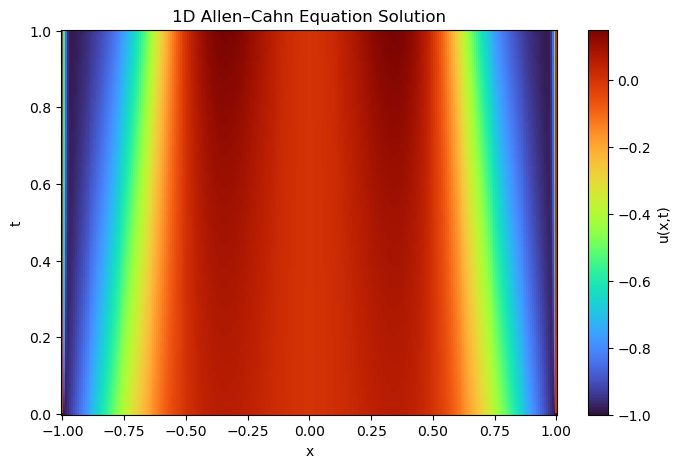

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==========================================
# Allen–Cahn Parameters
# ==========================================
eps = 0.01
nx = 256
nt = 200
Lx = 1.0
T = 1.0

x = np.linspace(-Lx, Lx, nx)
t = np.linspace(0, T, nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# Initial condition
def u0(x):
    return x**2 * np.cos(np.pi * x)

def boundary(u):
    u[0] = 0
    u[-1] = 0
    return u

# Finite difference solver
def solve_allen_cahn(eps, nx, nt, dx, dt):
    u = np.zeros((nt, nx))
    u[0, :] = u0(x)
    
    for n in range(0, nt - 1):
        un = u[n, :].copy()
        u[n + 1, 1:-1] = (
            un[1:-1]
            + dt * (
                eps**2 * (un[2:] - 2*un[1:-1] + un[:-2]) / dx**2
                - un[1:-1]**3
                + un[1:-1]
            )
        )
        u[n + 1, :] = boundary(u[n + 1, :])
    return u

# Solve
u = solve_allen_cahn(eps, nx, nt, dx, dt)
X, Tt = np.meshgrid(x, t)
data = np.vstack([X.flatten(), Tt.flatten(), u.flatten()]).T

# Save
df = pd.DataFrame(data, columns=["x", "t", "u"])
df.to_csv("allen_cahn_1d.csv", index=False)
print("✅ Saved Allen–Cahn dataset -> allen_cahn_1d.csv")

# Collocation points
N_f = 20000
x_f = np.random.uniform(-Lx, Lx, (N_f, 1))
t_f = np.random.uniform(0, T, (N_f, 1))
pd.DataFrame(np.hstack([x_f, t_f]), columns=["x","t"]).to_csv("allen_cahn_collocation.csv", index=False)
print("✅ Saved collocation points -> allen_cahn_collocation.csv")

# Plot
plt.figure(figsize=(8, 5))
plt.pcolormesh(X, Tt, u, shading="auto", cmap="turbo")
plt.xlabel("x"); plt.ylabel("t")
plt.title("1D Allen–Cahn Equation Solution")
plt.colorbar(label="u(x,t)")
plt.show()
